## 머신러닝
# 학습/테스트 데이터 분리
- 훈련시에는 훈련데이터 사용
- 평가/검증 시에는 테스트데이터 사용
- 훈련된 모델을 공정하게 평가하기 위함 (훈련시 사용한 데이터로 모델을 검증하는 건 공정하지 못함)

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### 데이터 불러오기

In [3]:
from sklearn.datasets import load_boston

In [4]:
boston = load_boston()

In [5]:
boston.data.shape

(506, 13)

In [6]:
boston.target

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

### 학습/테스트 데이터 분리 적용

In [7]:
from sklearn.model_selection import train_test_split

In [13]:
X_train, X_test, y_train, y_test = train_test_split(boston.data, boston.target)

In [14]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((379, 13), (127, 13), (379,), (127,))

In [15]:
127/506 # 25% 를 테스트 데이터로 할당함

0.2509881422924901

In [16]:
X_train, X_test, y_train, y_test = train_test_split(boston.data, boston.target,
                                        test_size=0.3, shuffle=True)

In [17]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((354, 13), (152, 13), (354,), (152,))

In [18]:
152/506

0.30039525691699603

### 데이터 정규화
- 학습데이터의 평균과 표준편차로 테스트데이터를 정규화하는게 일반적임

In [19]:
m = X_train.mean(axis=0)
s = X_train.std(axis=0)
m, s

(array([3.34994895e+00, 1.12768362e+01, 1.11189266e+01, 7.34463277e-02,
        5.56562429e-01, 6.30139548e+00, 6.87920904e+01, 3.72692825e+00,
        9.09322034e+00, 4.06629944e+02, 1.84158192e+01, 3.56583305e+02,
        1.26121751e+01]),
 array([7.95228519e+00, 2.32361295e+01, 6.88821260e+00, 2.60867715e-01,
        1.17446337e-01, 7.11953735e-01, 2.79214191e+01, 2.05070530e+00,
        8.43015902e+00, 1.63586762e+02, 2.17853642e+00, 9.11361737e+01,
        7.10161763e+00]))

In [20]:
X_train_norm = (X_train - m) / s
X_test_norm = (X_test - m) / s

X_train_norm.shape, X_test_norm.shape

((354, 13), (152, 13))

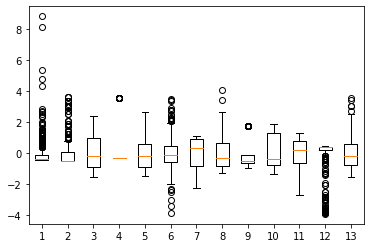

In [22]:
plt.boxplot(X_train_norm)
pass

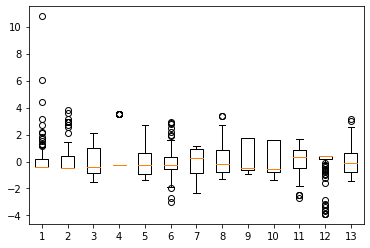

In [23]:
plt.boxplot(X_test_norm)
pass

### 선형회귀 훈련
- 학습데이터로 훈련

In [24]:
from sklearn.linear_model import LinearRegression

In [25]:
model = LinearRegression()

In [28]:
model.fit(X_train_norm, y_train) # X_train_norm 과 y_train 을 사용

LinearRegression()

### 훈련결과 평가
- 테스트데이터로 평가 및 검증

In [29]:
y_pred = model.predict(X_test_norm) # X_test_norm 을 사용

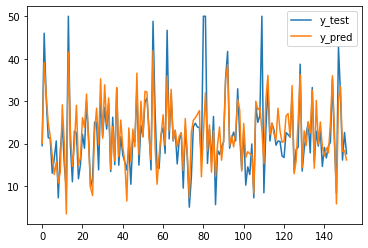

In [30]:
plt.plot(y_test) # y_test 사용
plt.plot(y_pred)
plt.legend(['y_test', 'y_pred'])

In [31]:
### mean squared error
mse = ((y_test-y_pred)**2).mean()
mse

26.263201877328385

In [32]:
### mean absolute error
mae = np.abs(y_test-y_pred).mean()
mae

3.44819023463448

In [33]:
### coefficient of determination `R^2`
model.score(X_test_norm, y_test)

0.6793934802421326

- 훈련데이터로 예측
> 테스트데이터에 비해 오차가 적다 (훈련시 경험한 데이터이므로)

In [34]:
y_pred_train = model.predict(X_train_norm)

In [35]:
### mean squared error
mse = ((y_train - y_pred_train)**2).mean()
mse

20.848449385742423

In [37]:
### mean absolute error
mae = np.abs(y_train - y_pred_train).mean()
mae

3.2944248602089496

In [38]:
### coefficient of determination `R^2`
model.score(X_train_norm, y_train)

0.7555041274553724

### (참고) 분리된 데이터의 원본번호를 아는 방법

In [49]:
X_train, X_test, y_train, y_test, idx_train, idx_test = \
            train_test_split(boston.data, boston.target, np.arange(506))

In [50]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape, \
        idx_train.shape, idx_test.shape

((379, 13), (127, 13), (379,), (127,), (379,), (127,))

In [51]:
idx_train

array([148, 210, 385, 205, 286, 302,  80,  79,  30, 499, 314, 254,  57,
       126,  20, 305, 197, 482, 503, 301,  12,   7, 285,  95, 263, 366,
       332,  29, 161,   8, 469,  28, 272, 380, 186, 112, 283, 131,  71,
       234, 299, 237, 133, 389, 374,   4, 184,  21, 198, 139, 140, 472,
        70, 399, 417, 290, 116, 119, 105, 216, 309, 442, 464,  74, 238,
       336, 455, 262, 146, 352,  64,   6, 316, 200,  81,   3, 341, 128,
       310, 202, 115, 279,  58, 125, 106, 248, 486, 329, 235, 415, 393,
       228, 178, 428,  83, 356, 163, 231, 203, 273, 395, 462, 376, 449,
       121, 252,  33, 166, 480, 337, 453, 143,  19, 149, 240, 326,  84,
       362,  31,  17, 346, 130, 113, 257, 207, 474, 367,  75,  52, 448,
        99, 175, 110, 152, 430, 406, 437, 220,  94, 250,  42, 217, 365,
       490, 402, 319, 155, 222,  47, 473, 452, 391, 335, 370, 379, 363,
       259,  13, 454, 340, 236,   5, 169, 435,  65, 355, 201, 144, 189,
       180, 343, 253, 204,  43, 457,  63, 100, 432, 409, 492, 13

In [52]:
idx_test

array([ 51, 445, 381, 276, 390, 265, 214, 345, 264, 331,  11,  72, 258,
       243, 317, 427, 312, 497, 221, 141, 471, 436, 142,  98, 429, 325,
       451, 284, 174, 296, 491, 446, 375, 156, 434, 206, 294,  85, 188,
       461, 102, 383, 177, 388,  49,   2, 419, 468, 386, 261, 118, 134,
       219, 504,  77, 425, 269, 373, 487,  46, 484, 132, 190, 361, 303,
       413, 463, 151,  16, 107, 334, 226, 324, 181, 277, 369,  32, 225,
       185, 320, 300,  66, 387,  50, 127, 394,  61, 422, 358, 120,  22,
       274, 282, 496, 246, 397, 278, 256, 500, 357, 407, 135, 114,  97,
        93, 244,  36, 467, 104,  38, 307, 465, 304, 382, 405,  86, 501,
       109, 372,  96, 170, 470,  48,  90, 475,  69, 260])